In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.utils import shuffle

import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

import joblib

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
import missingno as mno 

from google.colab import files

In [ ]:
df = pd.read_csv('/content/Sonar Data.csv',header = None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
df.shape

(208, 61)

In [ ]:
df = shuffle(df).reset_index(drop = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0363,0.0478,0.0298,0.0210,0.1409,0.1916,0.1349,0.1613,0.1703,0.1444,...,0.0115,0.0190,0.0055,0.0096,0.0050,0.0066,0.0114,0.0073,0.0033,M
1,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068,M
2,0.0335,0.0134,0.0696,0.1180,0.0348,0.1180,0.1948,0.1607,0.3036,0.4372,...,0.0244,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156,M
3,0.0116,0.0744,0.0367,0.0225,0.0076,0.0545,0.1110,0.1069,0.1708,0.2271,...,0.0141,0.0103,0.0100,0.0034,0.0026,0.0037,0.0044,0.0057,0.0035,M
4,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M


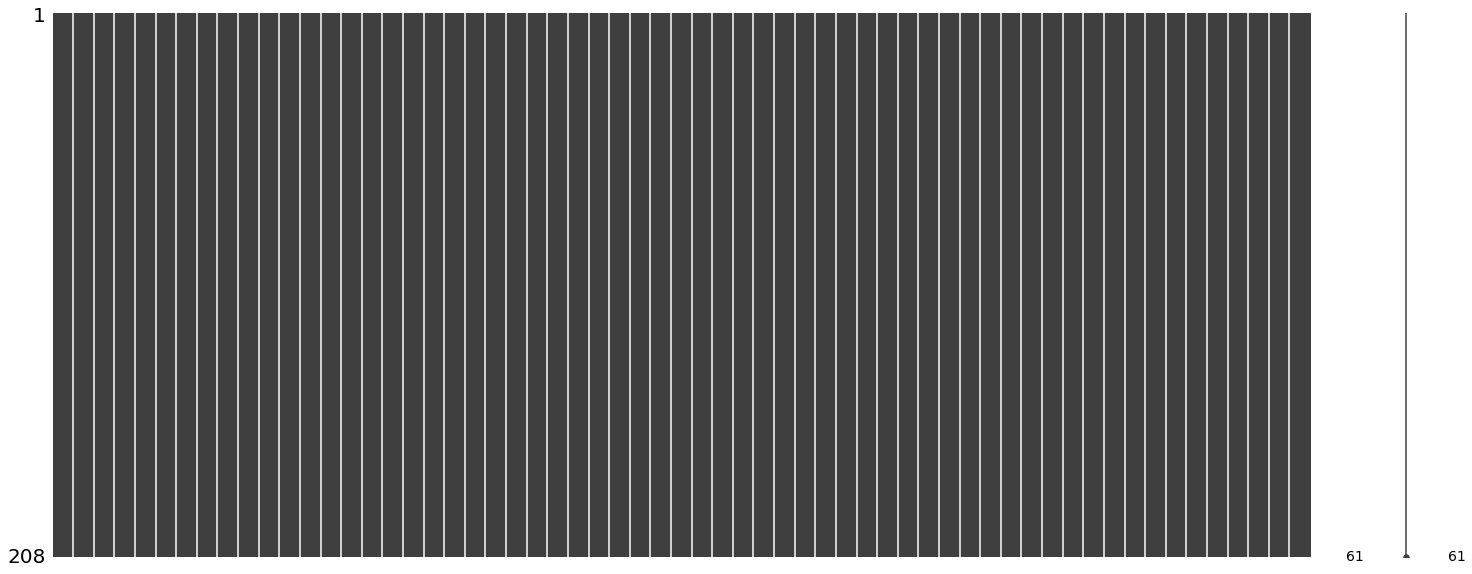

In [ ]:
mno.matrix(df)

In [ ]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


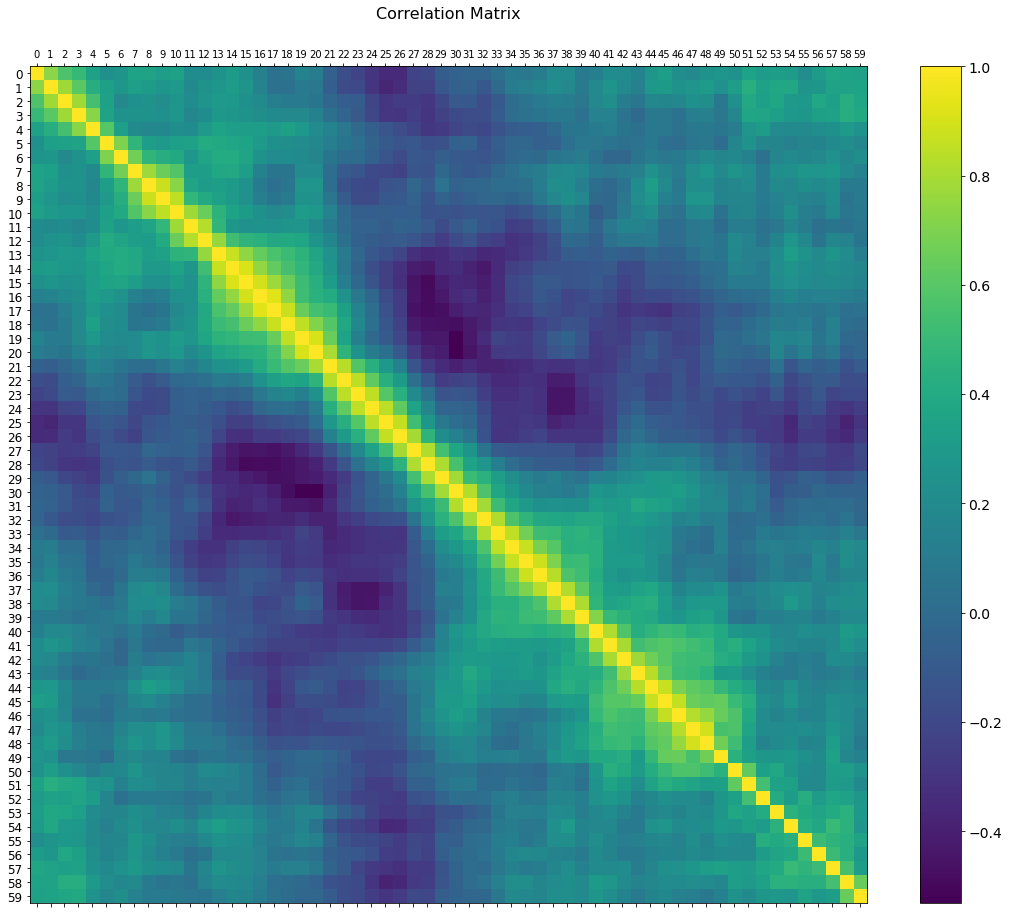

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

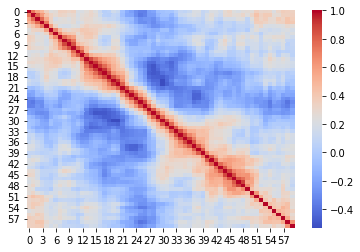

In [ ]:
sns.heatmap(df.corr(), fmt = '.2f', cmap ='coolwarm')

In [ ]:
x = []
y = []

x = df.iloc[:,0:60].values
y = df.iloc[:,-1].values

In [ ]:
x

array([[0.0363, 0.0478, 0.0298, ..., 0.0114, 0.0073, 0.0033],
       [0.0712, 0.0901, 0.1276, ..., 0.0101, 0.0095, 0.0068],
       [0.0335, 0.0134, 0.0696, ..., 0.0377, 0.0126, 0.0156],
       ...,
       [0.0336, 0.0294, 0.0476, ..., 0.0015, 0.0069, 0.0051],
       [0.0202, 0.0104, 0.0325, ..., 0.0054, 0.0073, 0.0054],
       [0.0201, 0.0165, 0.0344, ..., 0.0105, 0.0082, 0.0036]])

In [ ]:
y

array(['M', 'M', 'M', 'M', 'M', 'R', 'R', 'R', 'M', 'R', 'M', 'M', 'M',
       'R', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M',
       'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'R', 'M',
       'R', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'R', 'R',
       'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'R', 'M',
       'R', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'R', 'M', 'M', 'M', 'M',
       'M', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'R',
       'R', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M',
       'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'R', 'M', 'R',
       'M', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'M',
       'R', 'R', 'R', 'M', 'M', 'R', 'R', 'R', 'M', 'M', 'R', 'M', 'M',
       'M', 'R', 'M', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'M', 'M', 'M',
       'M', 'R', 'M', 'M', 'M', 'R', 'R', 'M', 'R', 'M', 'R', 'R

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [ ]:
type(y)

numpy.ndarray

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)
print(x.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(208, 60) (187, 60) (21, 60) (187,) (21,)


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
acc_logreg = round(accuracy_score(logreg_pred,y_test)*100)
acc_logreg

90

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rfacc = round(accuracy_score(rf_pred,y_test)*100)
rfacc

95

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_test)
dt_acc = round(accuracy_score(dt_pred,y_test)*100)
dt_acc

81

In [ ]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)
svc_acc = round(accuracy_score(svc_pred,y_test)*100)
svc_acc

95

In [ ]:
lsvc = LinearSVC()
lsvc.fit(x_train,y_train)
lsvc_pred = lsvc.predict(x_test)
lsvc_acc = round(accuracy_score(lsvc_pred,y_test)*100)
lsvc_acc

81

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
knn1.fit(x_train,y_train)
knn1_pred = knn1.predict(x_test)
knn1_acc = round(accuracy_score(knn1_pred,y_test)*100)
knn1_acc

95

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors = 6)
knn2.fit(x_train,y_train)
knn2_pred = knn2.predict(x_test)
knn2_acc = round(accuracy_score(knn2_pred,y_test)*100)
knn2_acc

90

In [ ]:
accuracy = pd.DataFrame({'Model':['Logistic Regression',
                                  'KNN 1','KNN 2','SVC','Linear SVC'
                        ,'Decision Tree','Random Forest'],
                       'Score':[acc_logreg,knn1_acc,knn2_acc,svc_acc,lsvc_acc,dt_acc,rfacc]})
accuracy.sort_values(by = 'Score',ignore_index = True)

,Model,Score
0,Linear SVC,81
1,Decision Tree,81
2,Logistic Regression,90
3,KNN 2,90
4,KNN 1,95
5,SVC,95
6,Random Forest,95


Text(0.5, 1.0, 'Accuracy of the Models')

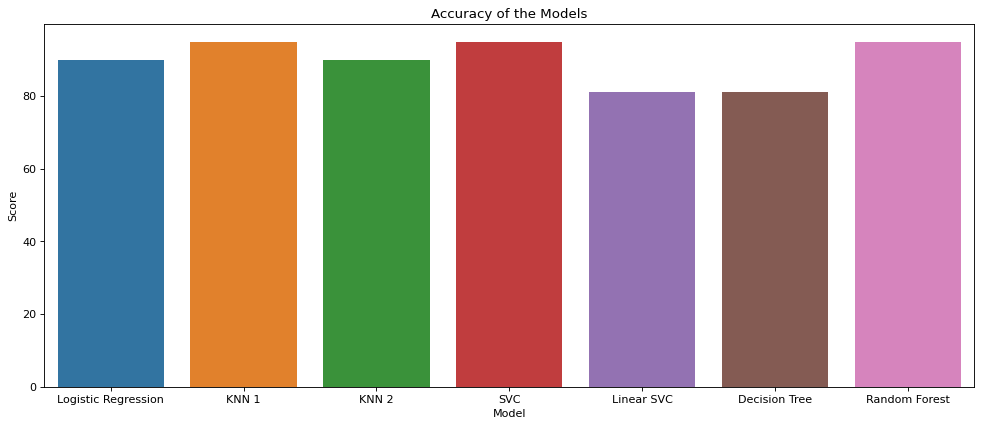

In [ ]:
plt.figure(figsize = (15,6),dpi = 80)
sns.barplot(x="Model", y="Score", data=accuracy, dodge = False)
plt.xlabel('Model')
plt.title('Accuracy of the Models')

In [ ]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(SVC())
classifiers.append(LinearSVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(KNeighborsClassifier(n_neighbors = 6))

len(classifiers)

7

In [ ]:
crossval_results = []
for classifier in classifiers:
  crossval_results.append(cross_val_score(classifier,x_train,y_train, scoring = 'accuracy', cv = 10))

In [ ]:
crossval_mean = []
crossval_std = []
for crossval_result in crossval_results:
  crossval_mean.append(crossval_result.mean())
  crossval_std.append(crossval_result.std())

In [ ]:
cv_res = pd.DataFrame({'Cross Validation Mean':crossval_mean,'Cross Validation Std':crossval_std,'Algorithm':['Logistic Regression','RandomForestClassifier','DecisionTreeClassifier','SVC','Linear SVC','KNN N5','KNN N6']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending= False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.833918,0.098010,RandomForestClassifier
1,0.776608,0.079500,SVC
2,0.750877,0.115974,Logistic Regression
3,0.745614,0.117673,Linear SVC
4,0.738304,0.089220,KNN N5
5,0.711988,0.118190,KNN N6
6,0.642982,0.102134,DecisionTreeClassifier


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cross Validation Scores')

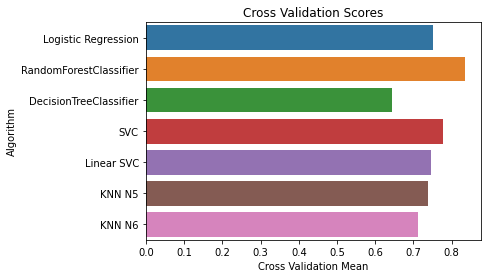

In [ ]:
sns.barplot('Cross Validation Mean', 'Algorithm',data = cv_res)
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

#### Since Random Forest has the highest cross validation score, we proceed with that

In [ ]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)

prediction

array([0])

In [ ]:
if prediction == 0:
  print('Mine')
else:
  print('Rock')

Mine


In [ ]:
joblib.dump(rf, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
joblib.dump(svc,'svc_model.joblib')

['svc_model.joblib']

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
X_train.shape[1]

60

In [ ]:
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units = 6,input_dim = 60, activation = 'relu'))
nn.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
nn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))
nn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)

Epoch 1/100
19/19 [==============================] - 1s 22ms/step - loss: 0.7464 - accuracy: 0.4652 - val_loss: 0.7536 - val_accuracy: 0.4762
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 0.7145 - accuracy: 0.5080 - val_loss: 0.7350 - val_accuracy: 0.5238
Epoch 3/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.5561 - val_loss: 0.7131 - val_accuracy: 0.5714
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6700 - accuracy: 0.5989 - val_loss: 0.6952 - val_accuracy: 0.6190
Epoch 5/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6521 - accuracy: 0.6257 - val_loss: 0.6828 - val_accuracy: 0.6190
Epoch 6/100
19/19 [==============================] - 0s 5ms/step - loss: 0.6385 - accuracy: 0.6684 - val_loss: 0.6730 - val_accuracy: 0.6190
Epoch 7/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6257 - accuracy: 0.6791 - val_loss: 0.6556 - val_accuracy: 0.6667
Epoch 8/100


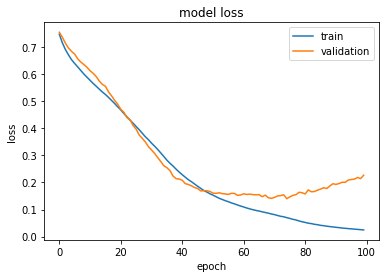

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

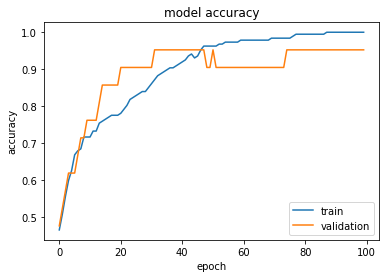

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
!mkdir -p saved_model
nn.save('saved_model/my_model')

In [ ]:
!zip -r /content/model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/my_model/ (stored 0%)
  adding: content/saved_model/my_model/saved_model.pb (deflated 88%)
  adding: content/saved_model/my_model/variables/ (stored 0%)
  adding: content/saved_model/my_model/variables/variables.data-00000-of-00001 (deflated 42%)
  adding: content/saved_model/my_model/variables/variables.index (deflated 63%)
  adding: content/saved_model/my_model/keras_metadata.pb (deflated 87%)
  adding: content/saved_model/my_model/assets/ (stored 0%)
